In [40]:
import re
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import Image

In [41]:
import sys
from src.cleaning_functions import *

In [42]:
sharks = pd.read_csv("./data/shark_attacks.csv",encoding = "ISO-8859-1")

Hipótesis:el número del muertes por tiburon ha descendido a lo largo del tiempo

In [43]:
sharks.sample(5)

,year,months_code,day,hour,country,sex,age,activity,species,type,injury,fatal_(y/n)
5337,1913.0,8.0,27.0,NaN,United States of America,F,NaN,NaN,NaN,NaN,injury,NaN
4564,1947.0,4.0,20.0,12.0,South Africa,M,21.0,wading,NaN,Provoked,injury,NO
4848,1936.0,12.0,1.0,NaN,Australia,M,50.0,fishing,white shark,Boating,fatal,YES
5341,1913.0,5.0,21.0,NaN,United States of America,M,NaN,fishing,NaN,Provoked,injury,NO
4123,1958.0,12.0,12.0,11.0,American Samoa,M,22.0,boating,tiger shark,Provoked,fatal,YES


### Ataques por año en función de si son o no mortales

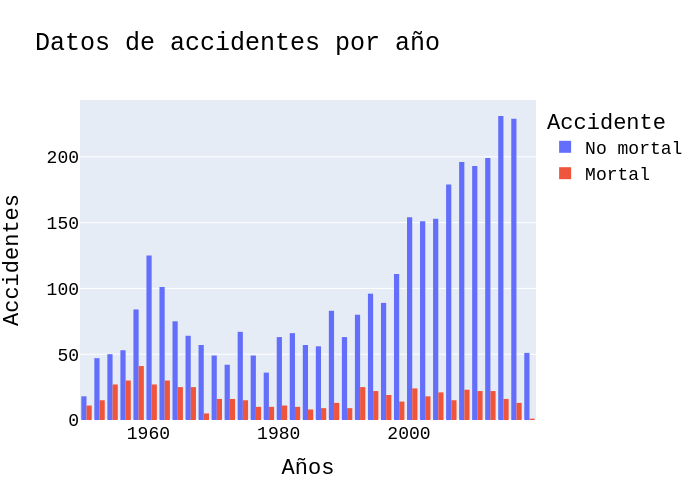

In [44]:
muertes_por_año_division = go.Figure()

muertes_por_año_division.add_trace(
    go.Histogram(
        x=sharks[(sharks["year"]>1950)&(sharks["fatal_(y/n)"]=="NO")].year
        ,name="No mortal"))

muertes_por_año_division.add_trace(
    go.Histogram(
        x=sharks[(sharks["year"]>1950)&(sharks["fatal_(y/n)"]=="YES")].year
        ,name="Mortal"))

muertes_por_año_division.update_layout(
    title="Datos de accidentes por año",
    xaxis_title="Años",
    yaxis_title="Accidentes",
    legend_title="Accidente",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="Black"
    )
)

muertes_por_año_division.write_html("./figures/muertes_por_año_division.html")
muertes_por_año_division.write_image("./figures/muertes_por_año_division.png")
Image(filename="./figures/muertes_por_año_division.png")

Puedes ver la figura interactiva haciendo click [aquí](https://nbviewer.org/github/rodrigogalan/data-cleaning-pandas/blob/main/figures/muertes_por_año_division.html)

### Ataques por mes en función del sexo

In [45]:
grafico_paises = list(sharks[(sharks["year"].notna())]["country"].value_counts().head(5).keys())

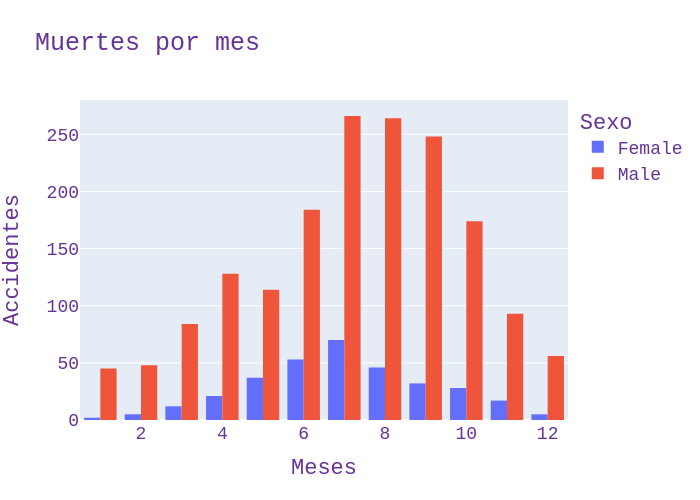

In [46]:
muertes_por_mes = go.Figure()

muertes_por_mes.add_trace(
    go.Histogram(
        x=sharks[(sharks.year>1800)&(sharks.country=="United States of America")&(sharks.sex.notna())&(sharks.sex=="F")]["months_code"]
        ,name="Female"))

muertes_por_mes.add_trace(
    go.Histogram(x=sharks[(sharks.year>1800)&(sharks.country=="United States of America")&(sharks.sex.notna())&(sharks.sex=="M")]["months_code"]
                 ,name="Male"))


muertes_por_mes.update_layout(
    title="Muertes por mes",
    xaxis_title="Meses",
    yaxis_title="Accidentes",
    legend_title="Sexo",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

muertes_por_mes.write_html("./figures/muertes_por_mes.html")
muertes_por_mes.write_image("./figures/muertes_por_mes.png")
Image(filename="./figures/muertes_por_mes.png")

Puedes ver la figura interactiva haciendo click [aquí](https://nbviewer.org/github/rodrigogalan/data-cleaning-pandas/blob/main/figures/muertes_por_mes.html)

### Ataques en función del país

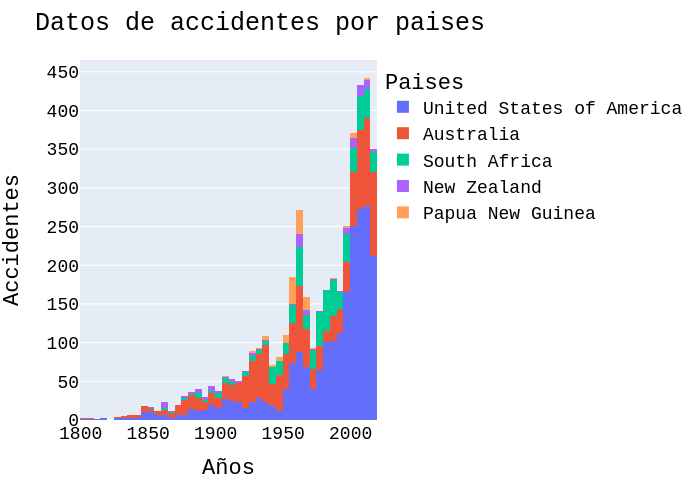

<Figure size 1080x288 with 0 Axes>

In [47]:
muertes_por_pais = plt.figure(figsize=(15,4))
muertes_por_pais = px.histogram(
    sharks, x=sharks[(sharks.year>1800)&(sharks.country.notna())&(sharks.country.isin(grafico_paises))]["year"],
    color=sharks[(sharks.year>1800)&(sharks.country.notna())&(sharks.country.isin(grafico_paises))]["country"]
)

muertes_por_pais.update_layout(
    title="Datos de accidentes por paises",
    xaxis_title="Años",
    yaxis_title="Accidentes",
    legend_title="Paises",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="Black"
    )
)

muertes_por_pais.write_html("./figures/muertes_por_pais.html")
muertes_por_pais.write_image("./figures/muertes_por_pais.png")
Image(filename="./figures/muertes_por_pais.png")

Puedes ver la figura interactiva haciendo click [aquí](https://nbviewer.org/github/rodrigogalan/data-cleaning-pandas/blob/main/figures/muertes_por_pais.html)

### Ataques en EEUU en función del sexo

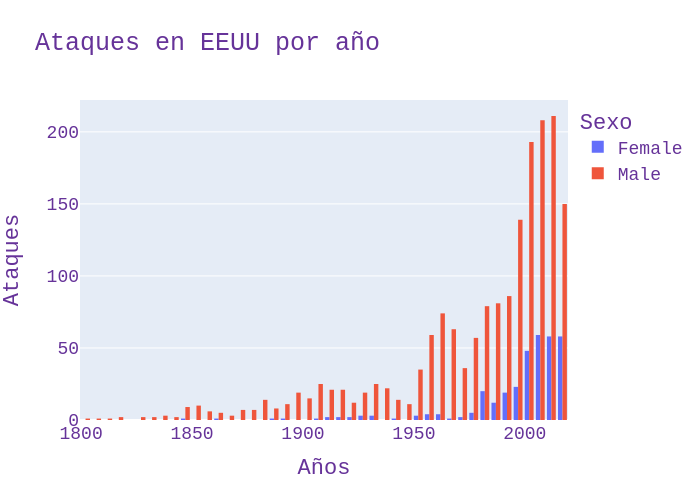

In [48]:
ataques_EEUU = go.Figure()

ataques_EEUU.add_trace(
    go.Histogram(
        x=sharks[(sharks.year>1800)&(sharks.country=="United States of America")&(sharks.sex.notna())&(sharks.sex=="F")]["year"]
        ,name="Female"))

ataques_EEUU.add_trace(
    go.Histogram(x=sharks[(sharks.year>1800)&(sharks.country=="United States of America")&(sharks.sex.notna())&(sharks.sex=="M")]["year"]
                 ,name="Male"))


ataques_EEUU.update_layout(
    title="Ataques en EEUU por año",
    xaxis_title="Años",
    yaxis_title="Ataques",
    legend_title="Sexo",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

ataques_EEUU.write_html("./figures/ataques_EEUU.html")
ataques_EEUU.write_image("./figures/ataques_EEUU.png")
Image(filename="./figures/ataques_EEUU.png")

Puedes ver la figura interactiva haciendo click [aquí](https://nbviewer.org/github/rodrigogalan/data-cleaning-pandas/blob/main/figures/ataques_EEUU.html)

### Datos de muertes por actividad

In [49]:
actividades = list(sharks[(sharks["fatal_(y/n)"].notna())]["activity"].value_counts().keys())
len(actividades)

9

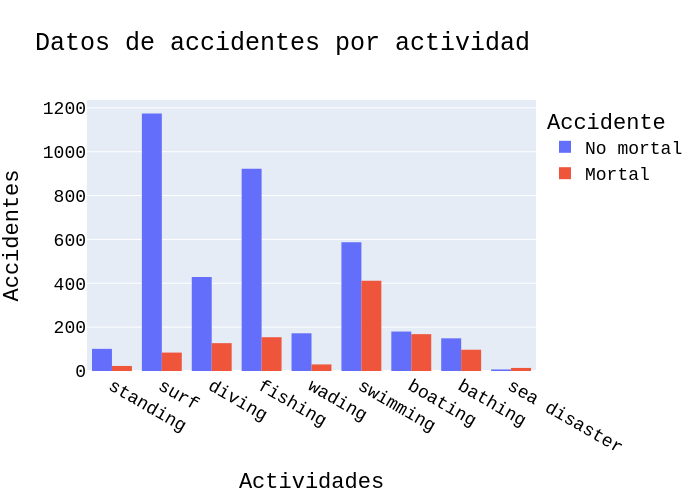

In [50]:
activity = go.Figure()

activity.add_trace(
    go.Histogram(
        x=sharks[(sharks.activity.notna())&(sharks["fatal_(y/n)"]=="NO")]["activity"]
        ,name="No mortal"))

activity.add_trace(
    go.Histogram(
        x=sharks[(sharks.activity.notna())&(sharks["fatal_(y/n)"]=="YES")]["activity"]
        ,name="Mortal"))

activity.update_layout(
    title="Datos de accidentes por actividad",
    xaxis_title="Actividades",
    yaxis_title="Accidentes",
    legend_title="Accidente",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="Black"
    )
)

activity.write_html("./figures/activity.html")
activity.write_image("./figures/activity.png")
Image(filename="./figures/activity.png")

Puedes ver la figura interactiva haciendo click [aquí](https://nbviewer.org/github/rodrigogalan/data-cleaning-pandas/blob/main/figures/activity.html)